# Introdução a séries temporais

## Agrupamento de dados

Para exemplificar a aplicação da técnica de agrupamento, utilizaremos as informações contidas no arquivo ```raw_sales.csv```.

In [36]:
import pandas as pd

df = pd.read_csv('raw_sales.csv')
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


Como a coluna ```datesold``` está associada as datas da série temporal, faremos as transformações necessárias.

In [37]:
df.datesold =  pd.to_datetime(df.datesold)
df.set_index('datesold', inplace=True)

O dataframe ```df``` contem o registro de compras de imóveis de 2007 até 2019 para uma localidade não identificada. A coluna ```postcode``` identifica a região correspondente ao imóvel, ```propertyType``` o tipo de imóvel e ```bedrooms``` o número de quartos.

Para esse caso, estamos interessados nos preços dos imóveis. Para exemplificar, filtraremos os preços associados ao ```postcode``` 2607.

In [14]:
df.postcode.unique()

array([2607, 2906, 2905, 2606, 2902, 2612, 2904, 2615, 2914, 2602, 2600,
       2605, 2603, 2611, 2903, 2617, 2913, 2604, 2614, 2912, 2601, 2900,
       2620, 2618, 2616, 2911, 2609])

In [41]:
df1 = df[df.postcode == 2607].price

Plotaremos o histórico de preços utilizando o comando ```DataFrame.plot()```.

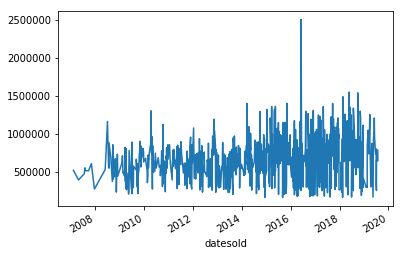

In [42]:
df1.plot()

A plotagem das informações dessa série histórica é de difícil interpretação por conta do grande volume de registros (963 para o ```postcode``` 2607). Se perguntássemos se houve aumento nas compras de imóveis com o passar dos anos em termos monetários, teriamos dificuldade de responder tal questão.

Para facilitar a análise, faremos o agrupamento dos dados por ano, efetuando a soma dos valores contidos em cada ano. Para tanto, utilizaremos o comando ```DataFrame.groupby(by=nome_da_coluna_ou_indice)```. O parâmetro ```by``` recebe a coluna ou índice de referência. Nesse caso, passaremos o ano como referência para o agrupamento através do comando ```DataFrame.index.year```. Esse comando só é aplicável quando o indice do dataframe é o tipo ```DatetimeIndex```. Para executar a soma dos grupos, acrescentaremos o comando ```sum()``` ao final. Para plotar o resultado, ascrecentaremos também o comando ```plot()```.

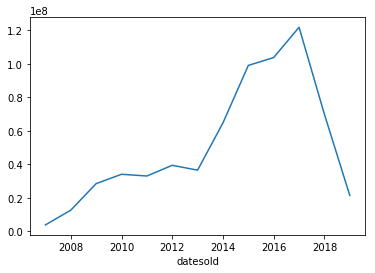

In [45]:
df1.groupby(by=df1.index.year).sum().plot()

Observamos, claramente, um aumento nas compras até 2017, seguido de uma queda significativa até 2019. Verificaremos, agora, se houve aumento no preço médio dos imóveis. Para tanto, basta subistituírmos o comando ```sum()``` pelo comando ```mean()```.

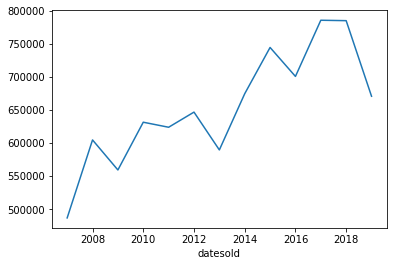

In [46]:
df1.groupby(by=df1.index.year).mean().plot()

Observamos um aumento no preço médio, com uma queda em 2019 (provavelmente resultado da queda nas compras).